In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [4]:
data = pd.read_excel('book1.xlsx')

In [6]:
data.head()

,Jumlah Sales,Pengeluaran Iklan,Penjualan Per Bulan
0,4,2.0,90
1,3,1.5,65
2,5,4.0,100
3,6,4.0,115
4,3,2.0,70


In [7]:
data.describe()

,Jumlah Sales,Pengeluaran Iklan,Penjualan Per Bulan
count,18.000000,18.00000,18.000000
mean,4.833333,2.75000,84.388889
std,1.543487,1.25147,26.061328
min,3.000000,1.00000,35.000000
25%,4.000000,2.00000,70.000000
50%,4.500000,2.75000,87.500000
75%,6.000000,3.75000,99.250000
max,8.000000,5.00000,125.000000


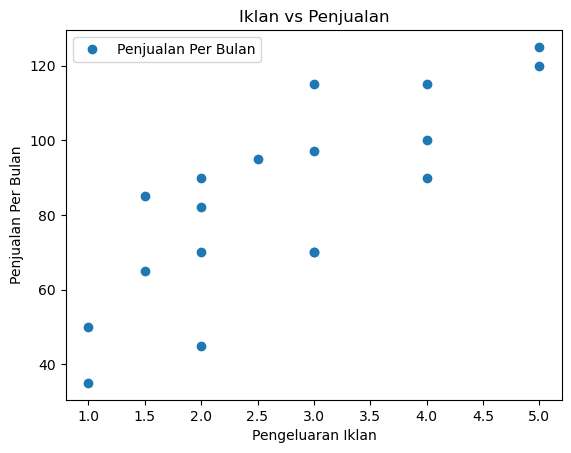

In [10]:
data.plot(x='Pengeluaran Iklan', y='Penjualan Per Bulan', style='o')
plt.title('Iklan vs Penjualan')
plt.xlabel('Pengeluaran Iklan')
plt.ylabel('Penjualan Per Bulan')
plt.show()

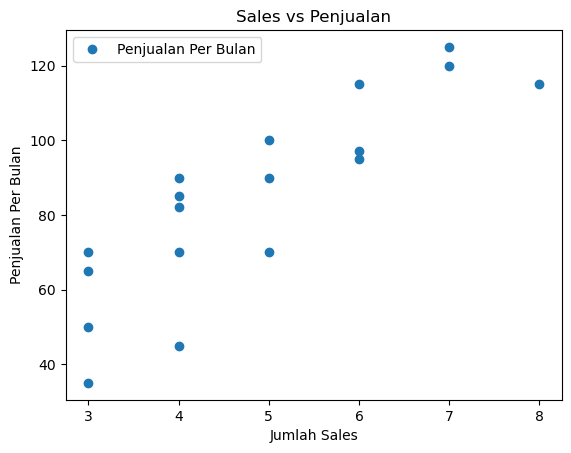

In [11]:
data.plot(x='Jumlah Sales', y='Penjualan Per Bulan', style='o')
plt.title('Sales vs Penjualan')
plt.xlabel('Jumlah Sales')
plt.ylabel('Penjualan Per Bulan')
plt.show()

In [15]:
#Import Module
import statsmodels
import patsy
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [20]:
#Variabel
xvar = ['Jumlah Sales', 'Pengeluaran Iklan']
x = data[xvar]
y = data['Penjualan Per Bulan']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [24]:
#Model
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred = linreg.predict(X_test)

In [26]:
y_pred

array([ 57.03828829,  98.13288288, 116.83108108,  79.43468468,
        97.48198198])

In [27]:
#RMSE
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

6.527150441201056


In [28]:
#mencari model regresi
model=sm.OLS(y,x).fit()
predictions=model.predict(x)
model.summary()

C:\Users\Kominfo\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Penjualan Per Bulan   R-squared (uncentered):                   0.979
Model:                             OLS   Adj. R-squared (uncentered):              0.976
Method:                  Least Squares   F-statistic:                              367.6
Date:                 Tue, 06 Dec 2022   Prob (F-statistic):                    4.24e-14
Time:                         09:46:43   Log-Likelihood:                         -71.514
No. Observations:                   18   AIC:                                      147.0
Df Residuals:                       16   BIC:                                      148.8
Df Model:                            2                                                  
Covariance Type:             nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Jumlah Sales         13.2496      2.444      5.421      0.000       8.068      18.431
Pengeluaran Iklan     6.8693      4.114      1.670      0.114      -1.852      15.590
==============================================================================
Omnibus:                        0.839   Durbin-Watson:                   0.983
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.697
Skew:                           0.091   Prob(JB):                        0.706
Kurtosis:                       2.053   Cond. No.                         8.65
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#menambahkan variabel konstan
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.summary()

C:\Users\Kominfo\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Penjualan Per Bulan   R-squared:                       0.780
Model:                             OLS   Adj. R-squared:                  0.751
Method:                  Least Squares   F-statistic:                     26.64
Date:                 Tue, 06 Dec 2022   Prob (F-statistic):           1.16e-05
Time:                         09:49:07   Log-Likelihood:                -70.074
No. Observations:                   18   AIC:                             146.1
Df Residuals:                       15   BIC:                             148.8
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                16.7694     10.392      1.614      0.127      -5.381      38.920
Jumlah Sales          9.7204      3.196      3.041      0.008       2.908      16.532
Pengeluaran Iklan     7.5046      3.942      1.904      0.076      -0.897      15.906
==============================================================================
Omnibus:                        0.836   Durbin-Watson:                   1.196
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.637
Skew:                          -0.423   Prob(JB):                        0.727
Kurtosis:                       2.633   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

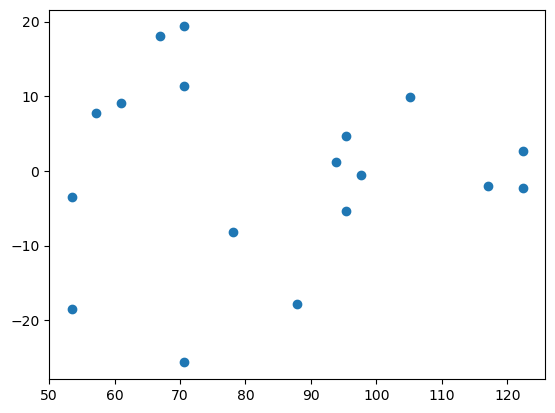

In [47]:
#Uji Hetero
import statsmodels.formula.api as smf
lm=smf.ols("data['Penjualan Per Bulan'] ~ data['Jumlah Sales'] + data['Pengeluaran Iklan']", data=data ).fit()
lm
resid=lm.resid
plt.scatter(lm.predict(),resid)
plt.show()

In [44]:
import statsmodels.stats as stats
stats.diagnostic.het_white(resid, lm.model.exog)

(5.82649347273853, 0.32346967298797663, 1.1486899278574743, 0.3878210294756854)

In [53]:
#Uji Multikol
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
lm = smf.ols("data['Penjualan Per Bulan'] ~ data['Jumlah Sales'] + data['Pengeluaran Iklan']", data = data).fit()
y,x = dmatrices ("data['Penjualan Per Bulan'] ~ data['Jumlah Sales'] + data['Pengeluaran Iklan']", data = data, return_type ="dataframe")
vif = [variance_inflation_factor(x, i) for i in range (x.shape[1])]
print(vif)

[11.497447532614855, 2.4465399886557, 2.4465399886557013]
